ORBITS EXAMPLES
===============

In [1]:
'''
Loading libraries
'''
import sys
sys.path.append('../../../../sophi_fdt_dpp/')  
import sophi_fdt_dpp as fdt
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
import os
import contextlib
@contextlib.contextmanager
def cwd_(path):
    oldpwd = os.getcwd()
    os.chdir(path)
    try:
        yield
    finally:
        os.chdir(oldpwd)

In [5]:
import spiceypy

REQUIRED_KERNELS = ['solo_ANC_soc-flown-mk.tm']
KERNELS_FULL_PATH_DIRECTORY = '../../src'
KERNELS_FULL_PATH_DIRECTORY = f'{KERNELS_FULL_PATH_DIRECTORY}/orbits-data/kernels/mk/'
with cwd_(KERNELS_FULL_PATH_DIRECTORY):
        try:
            spiceypy.furnsh(REQUIRED_KERNELS[0])
        except:
            raise IOError("Error reading kernel files",REQUIRED_KERNELS[0])

In [16]:
sc_time = [datetime(2020, 5, 15, 19, 0, 0), datetime(2020, 5, 21, 14, 00, 0)]
sc_time_spice = [spiceypy.str2et(t.strftime('%Y-%m-%d %H:%M')) for t in sc_time]
frame='SOLO_HEEQ'
solo, lT = spiceypy.spkezr('SOLO', sc_time_spice, frame, 'NONE', 'SUN')
sclkdp = spiceypy.spiceypy.sce2c(-144, sc_time_spice[0])
tolerance = 100
system="SOLO_SUN_RTN"
(cmat,clkout)=spiceypy.spiceypy.ckgp(-144000, sclkdp, tolerance, system)


SpiceyError: 
================================================================================

Toolkit version: N0066

SPICE(FILEOPENFAIL) --

Attempt to reconnect logical unit to file '../ck/solo_ANC_soc-flown-att_20220914T072825-20220914T203407_V01.bc' failed. IOSTAT was 2.

ckgp_c --> CKGP --> CKSNS --> DAFBBS --> DAFRFR --> ZZDAFGFR --> ZZDDHHLU

================================================================================

In [11]:
sclkdp

42132071135974.89

In [2]:
when = [datetime(2020, 5, 15, 19, 0, 0), datetime(2020, 5, 21, 14, 00, 0)]

solo_j2000 = fdt.phi_orbit(when, 'Solar Orbiter', frame='ECLIPJ2000')
solo_heeq = fdt.phi_orbit(when, 'Solar Orbiter', frame='SOLO_HEEQ')

for i, time in enumerate(when):
    print('____________________J2000 - HEEQ_______________________')
    print('Time: ', time)
    print('   Solo Sun center [degree]: ', solo_j2000.lat[i] * 180 / np.pi, solo_heeq.lat[i] * 180 / np.pi)
    print('   Longitud (wrt Earth): ', solo_j2000.lon[i] * 180 / np.pi, solo_heeq.lon[i] * 180 / np.pi)
    print('   Distance [AU]: ', solo_j2000.r[i], solo_heeq.r[i])
    print('   Solar size in arcsec from solo: ', solo_j2000[i].s_size, solo_heeq[i].s_size)
    print('   FDT solar diameter in pixels from solo: ', solo_j2000[i].s_size / 3.61, solo_heeq[i].s_size / 3.61)
    print('-------------------------------------------')

Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox (IdAdA)/Python/VS-GitHub/sophi_fdt_dpp/sophi_fdt_dpp/lib/orbits-data/kernels/mk/
Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox (IdAdA)/Python/VS-GitHub/sophi_fdt_dpp/sophi_fdt_dpp/lib/orbits-data/kernels/mk/
____________________J2000 - HEEQ_______________________
Time:  2020-05-15 19:00:00
   Solo Sun center [degree]:  1.735071004934514 0.6004748617717213
   Longitud (wrt Earth):  -113.15065878909174 11.4345477338876
   Distance [AU]:  0.6413416840315245 0.6413416840315245
   Solar size in arcsec from solo:  2990.403999881885 2990.403999881885
   FDT solar diameter in pixels from solo:  828.3667589700513 828.3667589700513
-------------------------------------------
____________________J2000 - HEEQ_______________________
Time:  2020-05-21 14:00:00
   Solo Sun center [degree]:  1.5896207844585692 1.9819661258395205
   Longitud (wrt Earth):  -101.02385770069601 17.939810705470226
   Distance [AU]:  0.6049284

Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox (IdAdA)/Python/VS-GitHub/sophi_fdt_dpp/sophi_fdt_dpp/lib/orbits-data/kernels/mk/


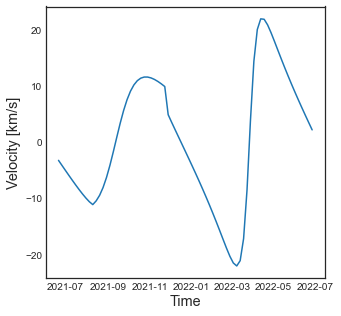

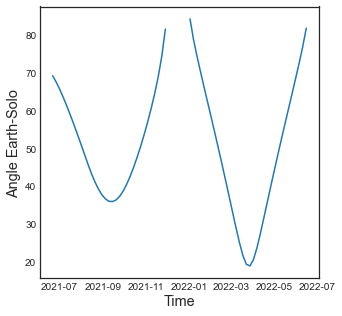

In [3]:
starttime=datetime(2021, 6, 21)
endtime=datetime(2022, 6, 27)
res_in_days=5

solo_info = fdt.phi_orbit(starttime, 'Solar Orbiter', end_date=endtime, resolution=res_in_days, frame='SOLO_HEEQ')

plt.plot_date(solo_info.time, solo_info.vr, '-')
plt.xlabel('Time')
plt.ylabel('Velocity [km/s]')
plt.show()

plt.plot_date(solo_info.time, solo_info.angle, '-')
plt.xlabel('Time')
plt.ylabel('Angle Earth-Solo')
plt.show()

In [4]:
def get_angles_solo_Earth(starttime=datetime(2021, 6, 21), endtime=datetime(2022, 6, 27), res_in_days=5):

    # load solo
    solo = fdt.phi_orbit(starttime, 'Solar Orbiter', end_date=endtime, resolution=res_in_days, frame='SOLO_HEEQ')
    Earth = fdt.phi_orbit(starttime, 'Earth', end_date=endtime, resolution=res_in_days, frame='SOLO_HEEQ')

    fig, ax = plt.subplots(1, 3, sharex= True, sharey= True, figsize=(15, 5))
    ax[0].plot(solo.x, solo.z, 'o', label='solo')
    ax[0].plot(Earth.x, Earth.z, 'o', label='Earth')
    ax[0].set_xlabel('x (AU)')
    ax[0].set_ylabel('z (AU)')
    ax[0].legend()
    ax[1].plot(solo.x, solo.y, 'o')
    ax[1].plot(Earth.x, Earth.y, 'o')
    ax[1].set_xlabel('x (AU)')
    ax[1].set_ylabel('y (AU)')

    ax[2].plot(solo.y, solo.z, 'o')
    ax[2].plot(Earth.y, Earth.z, 'o')
    ax[2].set_xlabel('y (AU)')
    ax[2].set_ylabel('z (AU)')

    for a in ax:
        a.grid()
        a.set_ylim(-1, 1)
        a.set_xlim(-1, 1)
    plt.tight_layout()
    plt.show()

    ang_heeq = fdt.angle([solo.x, solo.y, solo.z], [Earth.x, Earth.y, Earth.z])
    ang_solo = fdt.cart2sphere(solo.x, solo.y, solo.z)
    ang_earth = fdt.cart2sphere(Earth.x, Earth.y, Earth.z)
    diff = ang_earth[2] * 180 / np.pi - ang_solo[2] * 180 / np.pi
    idx = np.where(diff < 0)
    diff[idx] = 360 + diff[idx]

    x = np.array([solo.x, solo.y, solo.z])
    y = np.array([Earth.x, Earth.y, Earth.z])
    n = [0, 0, 1]
    ang2 = fdt.angle_3D(x, y, n)

    plt.plot_date(solo.time, ang_heeq, '-', label='Angle of Solo in HEEQ ref')
    plt.plot_date(solo.time, ang2, '-', label='Real angle between E-Solo')
    plt.plot_date(solo.time, ang_solo[2] * 180 / np.pi, '-', label='Spherical theta angle')
    plt.xlabel('Time')
    plt.ylabel('Angle Earth-Solo')
    plt.legend()
    plt.show()

    return solo.time, ang2


Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox (IdAdA)/Python/VS-GitHub/sophi_fdt_dpp/sophi_fdt_dpp/lib/orbits-data/kernels/mk/
Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox (IdAdA)/Python/VS-GitHub/sophi_fdt_dpp/sophi_fdt_dpp/lib/orbits-data/kernels/mk/


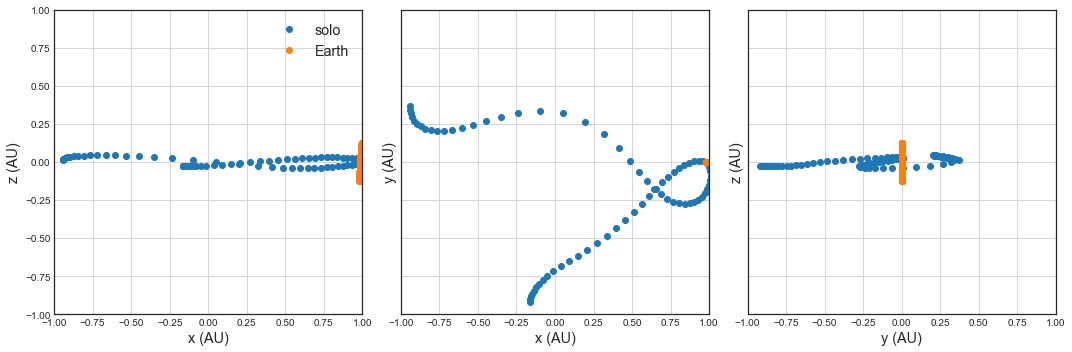

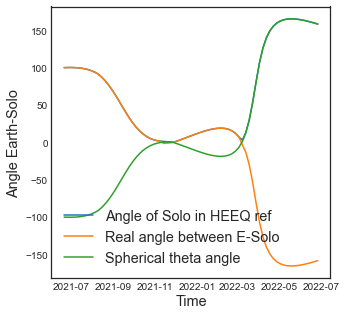

In [5]:
screc = get_angles_solo_Earth(starttime=datetime(2021, 6, 21), endtime=datetime(2022, 6, 27), res_in_days=5)